In [1]:
import requests
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import config

In [2]:
client_credentials_manager = SpotifyClientCredentials(
    client_id=config.client_id,
    client_secret=config.client_secret
)

sp = spotipy.Spotify(
    client_credentials_manager=client_credentials_manager
)

In [61]:
hot_100 = pd.read_csv('resources/data/billboard_hot100.csv')

In [62]:
hot_100

,rank,artist,song,year
0,1,Faith Hill,Breathe,2000
1,2,Santana feat. Rob Thomas,Smooth,2000
2,3,Santana feat. The Product GandB,Maria Maria,2000
3,4,Joe,I Wanna Know,2000
4,5,Vertical Horizon,Everything You Want,2000
...,...,...,...,...
95,97,Brave,Sara Bareilles,2013
96,98,Don’t Drop That Thun Thun!,The FiNATTiCZ,2013
97,99,TKO,Justin Timberlake,2013
98,40,"Mike WiLL Made-It Featuring Miley Cyrus, Wiz K...",23,2013


In [65]:
q = sp.search(q='23',type='track')

In [81]:
q['tracks']['items'][4]['album']['release_date']

'2018-09-07'

In [86]:
track = [x for x in q['tracks']['items'] if '2013' in x['album']['release_date']][0]

In [90]:
track['album'].keys()

dict_keys(['album_type', 'artists', 'available_markets', 'external_urls', 'href', 'id', 'images', 'name', 'release_date', 'release_date_precision', 'total_tracks', 'type', 'uri'])

In [104]:
d['release_date']=track['album']['release_date']
d['album_id']=track['album']['id']
d['album_name']=track['album']['name']
d['album_type']=track['album']['type']

d['artists'] = "".join([x['name']+', ' for x in track['artists']]).strip(' ,')

d['track_id'] = track['id']

In [110]:
d['track_name'] = track['name']

'23'

In [114]:
records = data.to_dict(orient='records')

In [204]:
def get_song_info(record):
    q = sp.search(q=record['song'],type='track')
    try:
        track = [x for x in q['tracks']['items'] if str(record['year']) in x['album']['release_date']][0]
    except IndexError:
        try:
            track = [x for x in q['tracks']['items'] if record['artist'] in [a['name'] for a in x['artists']]][0]
        except IndexError:
            try:
                artist = record['artist'].split('feat')[0].strip()
                track = [x for x in q['tracks']['items'] if artist in [a['name'] for a in x['artists']]][0]
            except IndexError:
                    track = [x for x in q['tracks']['items']][0]
    d = {}
    
    d['release_date']=track['album']['release_date']
    d['album_id']=track['album']['id']
    d['album_name']=track['album']['name']
    d['album_type']=track['album']['type']

    d['artists'] = "".join([x['name']+', ' for x in track['artists']]).strip(' ,')
    d['track_name'] = track['name']
    d['track_id'] = track['id']
    
    return d

In [131]:
for record in records:
    try:
        record.update(get_song_info(record))
    except:
        continue

retrying after...1secs
retrying after...1secs
retrying after...2secs
retrying after...1secs


In [134]:
data = pd.DataFrame.from_records(records)

In [137]:
errs = data[data['track_id'].isna()==True].to_dict(orient='records')

In [171]:
for e in errs:
    try:
        e.update(get_song_info(e))
    except:
        continue

retrying after...1secs


In [192]:
errs[:1]

[{'rank': 6,
  'artist': 'Destiny’s Child',
  'song': 'Say My Name',
  'year': 2000,
  'release_date': nan,
  'album_id': nan,
  'album_name': nan,
  'album_type': nan,
  'artists': nan,
  'track_name': nan,
  'track_id': nan}]

In [182]:
#data = data.dropna().append(pd.DataFrame.from_records(errs))

errs = data[data['track_id'].isna()==True].to_dict(orient='records')

In [206]:
for e in errs:
    try:
        e.update(get_song_info(e))
    except:
        continue

retrying after...2secs
retrying after...2secs
retrying after...3secs


In [207]:
data = data.dropna().append(pd.DataFrame.from_records(errs))

In [210]:
data[data['track_id'].isna()==True]

,rank,artist,song,year,release_date,album_id,album_name,album_type,artists,track_name,track_id
25,53,Lil’ Mo feat. Fabolous,Superwoman Pt. II,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,41,T-Pain feat. Mike Jones,I’n N Luv (Wit a Stripper),2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,1,Mark Ronson feat. Bruno Mars,Uptown Funk! LYRICS,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,2,Ed Sheeran,Thinking Out Loud LYRICS,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,3,Wiz Khalifa feat. Charlie Puth,See You Again LYRICS,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
366,77,Bad,Wale Featuring Tiara Thomas,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367,79,Crooked Smile,J Cole Featuring TLC,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,81,Bad,Wale Featuring Tiara Thomas Or Rihanna,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
371,90,Gas Pedal,Sage The Gemini Featuring IamSu,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.applymap()

In [3]:
me = sp.user("124718095")

In [4]:
my_playlists = sp.user_playlists(me['id'])

In [5]:
my_playlist_ids = {x['name']:x['id'] for x in my_playlists['items']}

In [6]:
my_playlist_ids['Your Top Songs 2019']

'37i9dQZF1Ethx9AjQdjLEb'

In [7]:
top_songs_2019 = sp.playlist_tracks(my_playlist_ids['Your Top Songs 2019'])

In [8]:
top_songs_2019_ids = {x['track']['name']:x['track']['id'] for x in top_songs_2019['items']}

## track features 

In [9]:
q = sp.search(q='Del Water Gap',type='artist')['artists']['items']
q

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/0xPoVNPnxIIUS1vrxAYV00'},
  'followers': {'href': None, 'total': 19238},
  'genres': ['deep new americana', 'indie pop'],
  'href': 'https://api.spotify.com/v1/artists/0xPoVNPnxIIUS1vrxAYV00',
  'id': '0xPoVNPnxIIUS1vrxAYV00',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/e628ab91e4ffacc38932adef0b72c1b8c6eae66a',
    'width': 640},
   {'height': 320,
    'url': 'https://i.scdn.co/image/3dcac05d36e7f2290d912e3bbaf2760b47bc985e',
    'width': 320},
   {'height': 160,
    'url': 'https://i.scdn.co/image/2be8f2fe4c36b9f5aac339e4ed6b9a91b49cf255',
    'width': 160}],
  'name': 'Del Water Gap',
  'popularity': 50,
  'type': 'artist',
  'uri': 'spotify:artist:0xPoVNPnxIIUS1vrxAYV00'}]

In [10]:
dwg_id = q[0]['id']

In [11]:
def get_artistTracks(artist_name=None,artist_id=None):
    if artist_name:
        artist = sp.search(q=artist_name,type='artist')['artists']['items'][0]
        artist_id = artist['id']
    albums = sp.artist_albums(artist['id'])['items']
    
    album_ids = [ 
        {'id':x['id'],'album_name':x['name']} for x in albums 
    ]
    
    album_tracks = [ sp.album_tracks(x['id']) for x in album_ids ]
    
    # item for sublist in list for item in sublist 
    tracks = [ 
        {
            'name':item['name'],
            'id':item['id'],
            'artists':[x['name'] for x in item['artists']]
        }
        for album in album_tracks 
        for item in album['items']
        if artist['name'] in [ x['name'] for x in item['artists'] ]
    ]
    
    return tracks

In [12]:
del_water_tracks = get_artistTracks(artist_name='Del Water Gap')

In [13]:
del_water_tracks[:5]

[{'name': "Don't Say Nothing - live in Fresno",
  'id': '4iCAH9P6e4ilKhc60qcRJv',
  'artists': ['Del Water Gap']},
 {'name': 'Theory of Emotion - live in Fresno',
  'id': '1jdcKxb3I3rzQUYZyekCgr',
  'artists': ['Del Water Gap']},
 {'name': 'Chastain - live in Fresno',
  'id': '519l7sJ9H0vshmI2X4rgQL',
  'artists': ['Del Water Gap']},
 {'name': 'To Philly - live in Fresno',
  'id': '3IAcmRXOPwmDLht8UDDrYp',
  'artists': ['Del Water Gap']},
 {'name': 'Laid Down My Arms - live in Fresno',
  'id': '5sYmFFLcruE6zBaO55Cl7d',
  'artists': ['Del Water Gap']}]

In [14]:
records = []
for track in del_water_tracks:
    audio_features = sp.audio_features(track['id'])[0]
    audio_features['artists'] = track['artists']
    audio_features['name'] = track['name']
    records.append(audio_features)

In [15]:
df = pd.DataFrame.from_records(records)

In [16]:
df.drop(columns=['track_href','analysis_url','type','uri'],inplace=True)

In [17]:
df['artists'] = df.apply(lambda x : "".join([artist+', ' for artist in x['artists']]).strip(', '),axis=1)

In [18]:
trs = sp.tracks(df['id'].to_list())

In [19]:
#df['popularity'] = df['id'].map({x['id']:x['popularity'] for x in trs['tracks']})

In [20]:
df['release_date'] = df['id'].map({x['id']:x['album']['release_date'] for x in trs['tracks']})

In [21]:
df.sort_values(by='release_date',axis=0,inplace=True)

In [22]:
df.drop_duplicates([x for x in df.columns if x not in ['release_date','name','id']],keep='first',inplace=True)

In [23]:
#df.drop(index=19,inplace=True)
df.reset_index(inplace=True,drop=True)

In [24]:
df['name']

0                              In the Yard
1                  Be My Own (Bonus Track)
2            I Am Drunk, And She Is Insane
3                                 Homeless
4              Lost My Cat / Put in a Cage
5                           Rockman's Pier
6                            Still in Love
7                                Lamplight
8                             Cut the Rope
9                                  Vanessa
10                               High Tops
11                   Don't Read the Mirror
12                          Deirdre, Pt. I
13                           Let's Pretend
14                Love Song for Lady Earth
15                    High Tops (Stripped)
16                       Laid Down My Arms
17                                Chastain
18                       Theory of Emotion
19                       Laid Down My Arms
20                               To Philly
21                                Chastain
22                       Don't Say Nothing
23         

In [25]:
with_charlie = [
    'I Am Drunk, And She Is Insane', 'Lost My Cat / Put in a Cage', 
    "Rockman's Pier", 'Still in Love', 'Lamplight', 'Cut the Rope', 
    'Vanessa', 'High Tops', 'Love Song for Lady Earth', "Let's Pretend",
    'Deirdre, Pt. I', "Don't Read the Mirror", 'Laid Down My Arms','Theory of Emotion'
]

In [26]:
not_charlie = df[~df['name'].isin(with_charlie)]['valence']

In [27]:
charlie = df[df['name'].isin(with_charlie)]['valence']

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

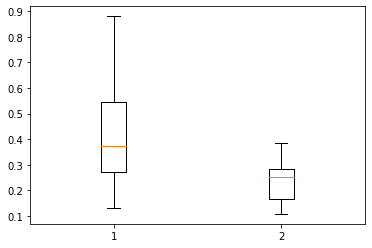

In [29]:
fig, ax = plt.subplots()
ax.boxplot([charlie,not_charlie])

plt.show()

## by playlist

In [31]:
sam_playlists = sp.user_playlists(1250134147)

In [32]:
sam_playlist_ids = [
    {'playlist_id':x['id'],'playlist_name':x['name']} for x in sam_playlists['items']]

In [33]:
sam_playlist_ids

[{'playlist_id': '0ti4xxabrASrUfndyMAM84', 'playlist_name': 'the end'},
 {'playlist_id': '4onXnKlx8zqSBFMoegjnTX',
  'playlist_name': 'wfh: pandemic edition'},
 {'playlist_id': '5pSaH0lwwMZQv4icmvLODy', 'playlist_name': 'working'},
 {'playlist_id': '5x3kN5QBau7m55CDq31jxY', 'playlist_name': 'hbd, dave'},
 {'playlist_id': '4yhHSqzDCxttvBEfMBOODi',
  'playlist_name': 'unpretentious resort wave'},
 {'playlist_id': '6jmzGHmwwueGgqw376qJku',
  'playlist_name': 'all killer no filler'},
 {'playlist_id': '2VBPgWKiFM2N5lXEFYp7sk',
  'playlist_name': 'The Wry Young Women Writing Sad, Buoyant, Beautiful Songs'}]

In [34]:
import time

In [36]:
records = []
for playlist in sam_playlist_ids:
    playlist_items = sp.playlist_tracks(playlist['playlist_id'])['items']
    track_ids = [item['track']['id'] for item in playlist_items]
    
    audio_features = [sp.audio_features(x)[0] for x in track_ids]
    for track in audio_features:
        track['playlist_name']=playlist['playlist_name']
    records.extend(audio_features)
    time.sleep(5)

In [37]:
playlist_df = pd.DataFrame.from_records(records)

In [38]:
playlist_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,playlist_name
0,0.459,0.617,8,-5.810,1,0.0353,0.000056,0.354000,0.0443,0.522,117.959,audio_features,1qoqz2LrkRl2A24OSdp6wI,spotify:track:1qoqz2LrkRl2A24OSdp6wI,https://api.spotify.com/v1/tracks/1qoqz2LrkRl2...,https://api.spotify.com/v1/audio-analysis/1qoq...,208967,4,the end
1,0.381,0.436,5,-6.731,1,0.0329,0.011800,0.000000,0.1330,0.453,183.923,audio_features,2guw9QqCoBNGlJTPQBAAHk,spotify:track:2guw9QqCoBNGlJTPQBAAHk,https://api.spotify.com/v1/tracks/2guw9QqCoBNG...,https://api.spotify.com/v1/audio-analysis/2guw...,149077,3,the end
2,0.468,0.635,8,-7.079,1,0.0273,0.000202,0.446000,0.1100,0.249,103.946,audio_features,6OHVsfC65IdO9MM8oQPthL,spotify:track:6OHVsfC65IdO9MM8oQPthL,https://api.spotify.com/v1/tracks/6OHVsfC65IdO...,https://api.spotify.com/v1/audio-analysis/6OHV...,159940,4,the end
3,0.262,0.651,9,-8.413,1,0.0322,0.000070,0.020200,0.0883,0.175,100.463,audio_features,2Lk6WptvmyH5SN73Pi4vZx,spotify:track:2Lk6WptvmyH5SN73Pi4vZx,https://api.spotify.com/v1/tracks/2Lk6WptvmyH5...,https://api.spotify.com/v1/audio-analysis/2Lk6...,237823,4,the end
4,0.377,0.499,9,-7.228,1,0.0323,0.002350,0.007680,0.1180,0.412,173.595,audio_features,52bYAaDo17L4JNdkBZ1rIw,spotify:track:52bYAaDo17L4JNdkBZ1rIw,https://api.spotify.com/v1/tracks/52bYAaDo17L4...,https://api.spotify.com/v1/audio-analysis/52bY...,206672,4,the end
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,0.181,0.653,5,-5.102,1,0.0380,0.366000,0.000085,0.1600,0.371,204.164,audio_features,3Nb8Fqfi1N01eAASK9jduB,spotify:track:3Nb8Fqfi1N01eAASK9jduB,https://api.spotify.com/v1/tracks/3Nb8Fqfi1N01...,https://api.spotify.com/v1/audio-analysis/3Nb8...,161600,4,"The Wry Young Women Writing Sad, Buoyant, Beau..."
233,0.459,0.824,5,-5.296,1,0.0399,0.007650,0.003540,0.1670,0.355,126.352,audio_features,5Ap9hgpKbDugMg7dQmtKgm,spotify:track:5Ap9hgpKbDugMg7dQmtKgm,https://api.spotify.com/v1/tracks/5Ap9hgpKbDug...,https://api.spotify.com/v1/audio-analysis/5Ap9...,180800,4,"The Wry Young Women Writing Sad, Buoyant, Beau..."
234,0.538,0.275,2,-8.015,1,0.0278,0.661000,0.000033,0.1450,0.186,97.548,audio_features,64sDUuHnNZgo5cnhVq9lIg,spotify:track:64sDUuHnNZgo5cnhVq9lIg,https://api.spotify.com/v1/tracks/64sDUuHnNZgo...,https://api.spotify.com/v1/audio-analysis/64sD...,152267,4,"The Wry Young Women Writing Sad, Buoyant, Beau..."
235,0.279,0.777,6,-3.922,1,0.0462,0.183000,0.761000,0.0874,0.605,118.977,audio_features,3kLsqsxZ9DDwmllHisvK92,spotify:track:3kLsqsxZ9DDwmllHisvK92,https://api.spotify.com/v1/tracks/3kLsqsxZ9DDw...,https://api.spotify.com/v1/audio-analysis/3kLs...,218400,4,"The Wry Young Women Writing Sad, Buoyant, Beau..."


In [39]:
def audioFeatures_byArtist(name=None,artist_id=None,track_ids=None,playlist=None):
    pass